# ASSIGNMENT-1

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.<br>
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
<br>Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('uber.csv')

In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2 15-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# Check for null values
df.isnull().values.any()

True

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [10]:
df = df[(df[['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']] != 0).all(axis=1)]

In [11]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195342 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195342 non-null  float64
 1   pickup_longitude   195342 non-null  float64
 2   pickup_latitude    195342 non-null  float64
 3   dropoff_longitude  195342 non-null  float64
 4   dropoff_latitude   195342 non-null  float64
 5   passenger_count    195342 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.4 MB


### Calculating Distance Travelled

In [12]:
from math import *

In [13]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [14]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

In [15]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,195342.0,11.350196,9.808223,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,195342.0,-73.929892,5.458969,-1340.648410,-73.992268,-73.982102,-73.968317,57.418457
pickup_latitude,195342.0,40.705428,5.436405,-74.015515,40.736392,40.753277,40.767540,1644.421482
dropoff_longitude,195342.0,-73.916906,8.533219,-3356.666300,-73.991592,-73.980523,-73.965317,1153.572603
dropoff_latitude,195342.0,40.688365,4.001301,-881.985513,40.735266,40.753724,40.768320,872.697628
passenger_count,195342.0,1.691152,1.386991,1.000000,1.000000,1.000000,2.000000,208.000000
dist_travel_km,195342.0,4.779755,94.275553,0.000000,1.255578,2.157333,3.911098,16409.239135


In [17]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [18]:
df.fare_amount.min()

-52.0

### Checking Outliers

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

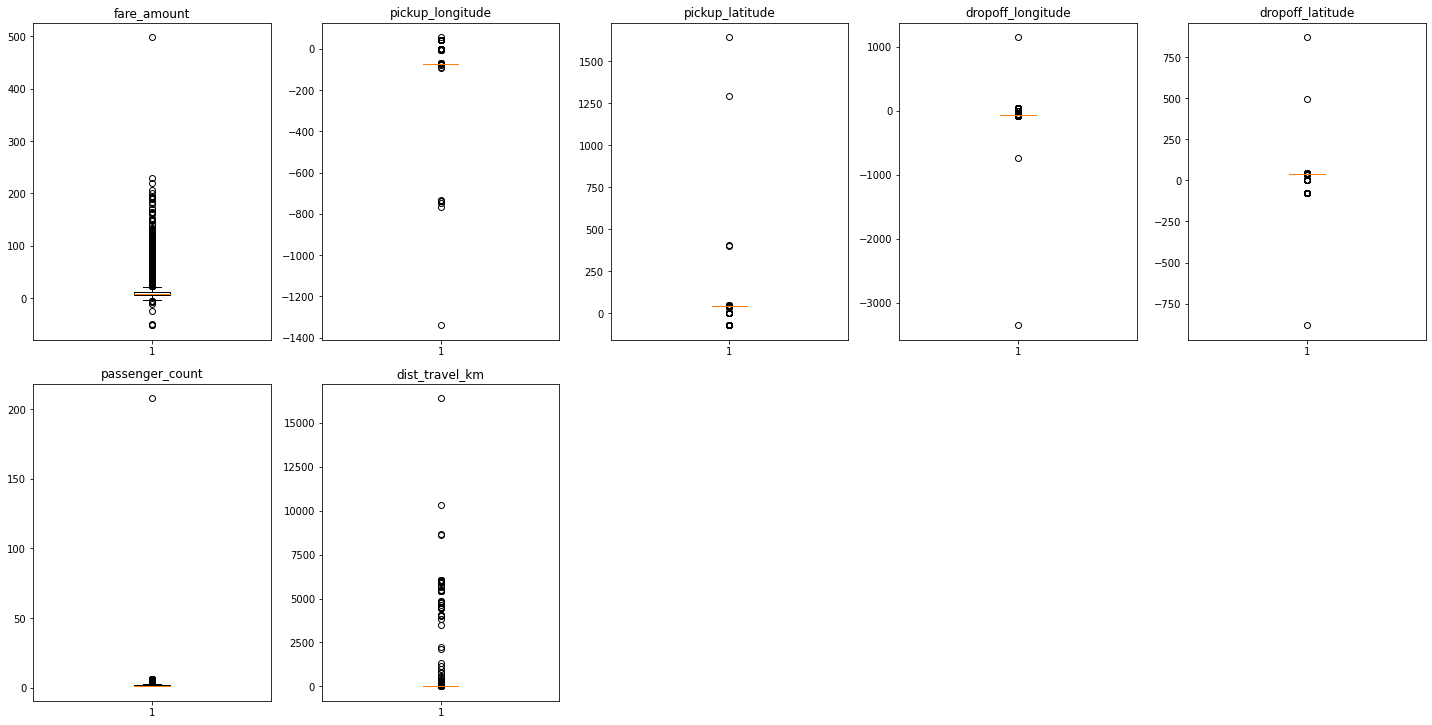

In [20]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Removing Outliers

In [21]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [22]:
df = treat_outliers_all(df , df.iloc[: , 0::])

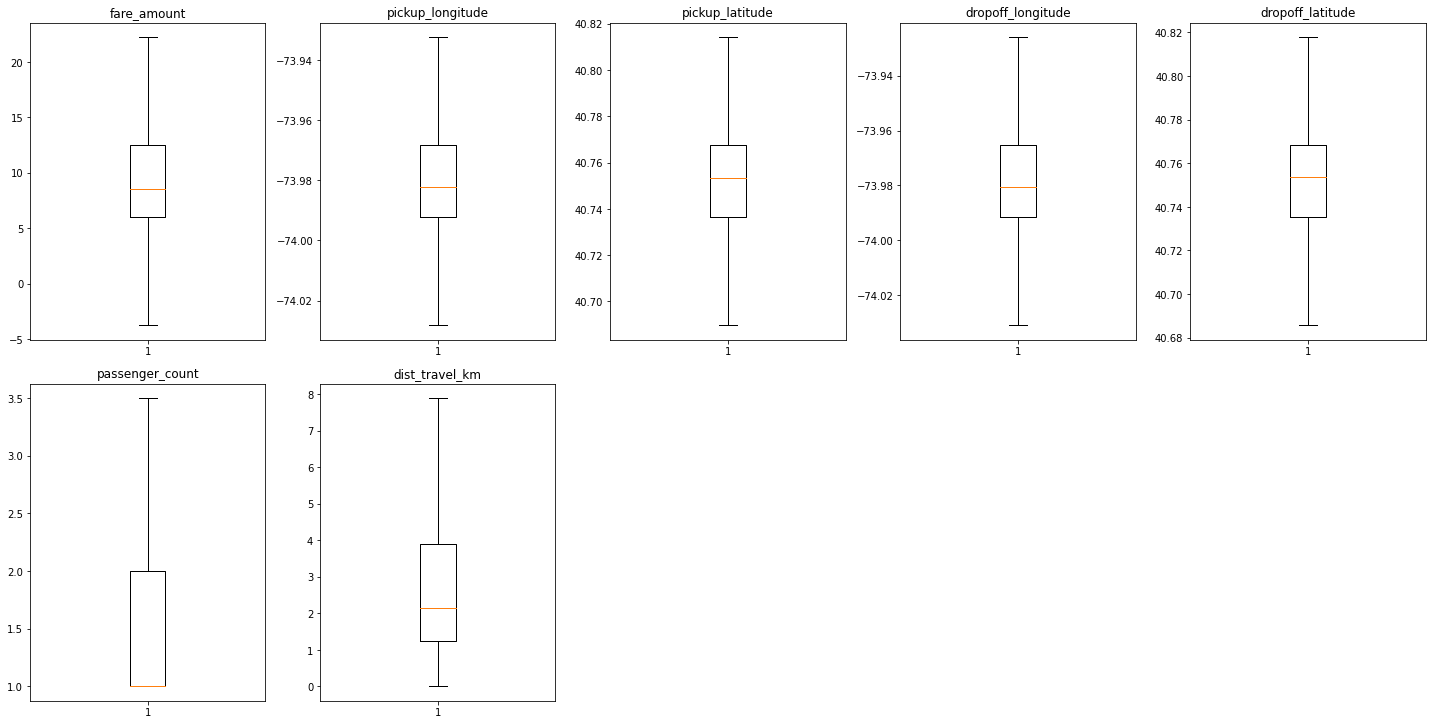

In [23]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Choosing x and y

In [24]:
y = pd.DataFrame(df['fare_amount'])
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195342 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fare_amount  195342 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


In [25]:
y.head()

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0


In [26]:
x = df.drop('fare_amount',axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195342 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   195342 non-null  float64
 1   pickup_latitude    195342 non-null  float64
 2   dropoff_longitude  195342 non-null  float64
 3   dropoff_latitude   195342 non-null  float64
 4   passenger_count    195342 non-null  float64
 5   dist_travel_km     195342 non-null  float64
dtypes: float64(6)
memory usage: 10.4 MB


In [27]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,-73.932391,40.744085,-73.973082,40.761247,3.5,4.475450


### Train-Test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [30]:
print("The shape of X_train is:",x_train.shape)

print("The shape of X_test is:",x_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (156273, 6)
The shape of X_test is: (39069, 6)
The shape of y_train is: (156273, 1)
The shape of y_test is: (39069, 1)


### Linear Regression  Model

In [31]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [32]:
linreg_full = sm.OLS(y_train, x_train).fit()
linreg_full_predictions = linreg_full.predict(x_test)
linreg_full_predictions.head()

43809     17.207775
91605     11.181753
62043      9.165019
97035     20.433969
160889     6.646877
dtype: float64

In [33]:
linreg_full_predictions = linreg_full.predict(x_test)
linreg_full_predictions

43809     17.207775
91605     11.181753
62043      9.165019
97035     20.433969
160889     6.646877
            ...    
4270      17.841695
187559    19.682936
146187     9.348495
24417     21.075918
99017      6.873840
Length: 39069, dtype: float64

In [34]:
actual_fare = y_test["fare_amount"]
actual_fare.head()

43809     17.00
91605     11.90
62043      8.10
97035     22.25
160889     4.90
Name: fare_amount, dtype: float64

In [35]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_fare,linreg_full_predictions )

# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [40]:
print('Model: Linreg full model',
      '\nRMSE:  ',linreg_full_rmse,
      '\nR-Squared: ', linreg_full_rsquared,
      '\nAdj. R-Squared:  ', linreg_full_rsquared_adj)


Model: Linreg full model 
RMSE:   2.699162595225123 
R-Squared:  0.9460227024624958 
Adj. R-Squared:   0.9460206299597587


In [41]:
a= linreg_full.predict([-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323])
print(a)

[7.69642515]
